In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_boston
dataset = load_boston()
x, t = dataset.data, dataset.target
columns = dataset.feature_names

In [3]:
type(x), x.shape, type(t), t.shape

(numpy.ndarray, (506, 13), numpy.ndarray, (506,))

In [4]:
df = pd.DataFrame(x, columns = columns)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
df['Target'] = t
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
t = df['Target'].values
x = df.drop(labels = ['Target'], axis = 1).values

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size = 0.3, random_state = 0)

In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [9]:
model.fit(x_train, t_train)

LinearRegression()

In [10]:
model.coef_

array([-1.21310401e-01,  4.44664254e-02,  1.13416945e-02,  2.51124642e+00,
       -1.62312529e+01,  3.85906801e+00, -9.98516565e-03, -1.50026956e+00,
        2.42143466e-01, -1.10716124e-02, -1.01775264e+00,  6.81446545e-03,
       -4.86738066e-01])

<BarContainer object of 13 artists>

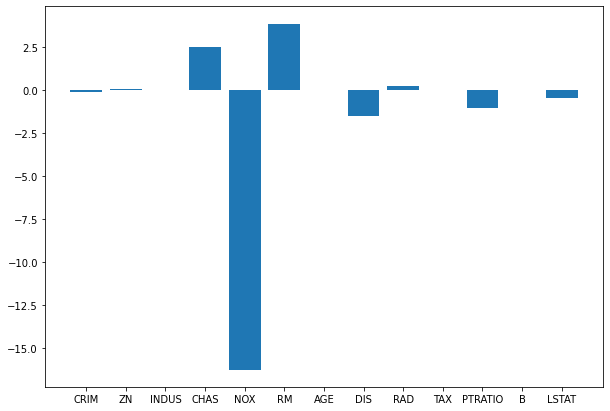

In [11]:
plt.figure(figsize = (10, 7))
plt.bar(x = columns, height = model.coef_)

In [12]:
model.intercept_

37.93710774183309

In [13]:
print('train score : ', model.score(x_train, t_train))
print('test score : ', model.score(x_test, t_test))

train score :  0.7645451026942549
test score :  0.6733825506400171


In [14]:
y = model.predict(x_test)
print('予測値 : ', y[0])
print('目標値 : ', t_test[0])

予測値 :  24.935707898576915
目標値 :  22.6


In [15]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 1)

In [16]:
ridge.fit(x_train, t_train)
print('train score : ', ridge.score(x_train, t_train))
print('test score : ', ridge.score(x_test, t_test))

train score :  0.7623440182689594
test score :  0.6665819091486687


Text(0.5, 1.0, 'Ridge Regression')

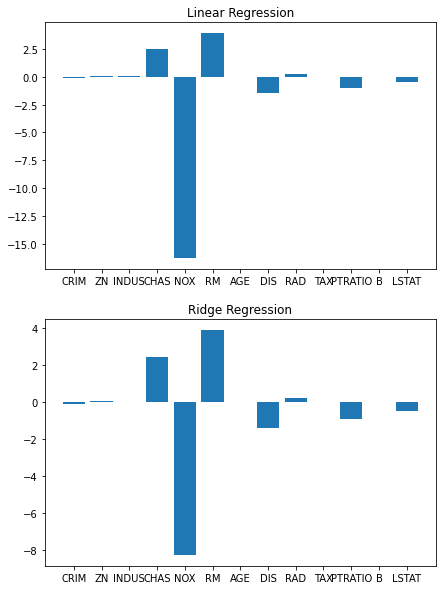

In [17]:
fig = plt.figure(figsize = (7, 10))

# 重回帰分析
ax1 = fig.add_subplot(2, 1, 1)
ax1.bar(x = columns, height = model.coef_)
ax1.set_title('Linear Regression')

# リッジ回帰
ax2 = fig.add_subplot(2, 1, 2)
ax2.bar(x = columns, height = ridge.coef_)
ax2.set_title('Ridge Regression')

In [18]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 1)

In [19]:
lasso.fit(x_train, t_train)
print('train score : ', lasso.score(x_train, t_train))
print('test score : ', lasso.score(x_test, t_test))

train score :  0.7084095500978868
test score :  0.6115433359595555


In [20]:
print('元の特徴量の数 : ', x.shape[1])
print('Lassoの特徴量の数 : ', np.sum(lasso.coef_ != 0))

元の特徴量の数 :  13
Lassoの特徴量の数 :  10


In [21]:
print(x.shape, t.shape)

(506, 13) (506,)


In [23]:
lasso_005 = Lasso(alpha = 0.05)
lasso_005.fit(x_train, t_train)
print('train score : ', lasso_005.score(x_train, t_train))
print('test score : ', lasso_005.score(x_test, t_test))

train score :  0.7548928631432029
test score :  0.6541502573235292


In [24]:
print('元の特徴量の数 : ', x.shape[1])
print('Lasso005の特徴量 : ', np.sum(lasso_005.coef_ != 0))

元の特徴量の数 :  13
Lasso005の特徴量 :  12


Text(0.5, 1.0, 'Linear Regression 0.05')

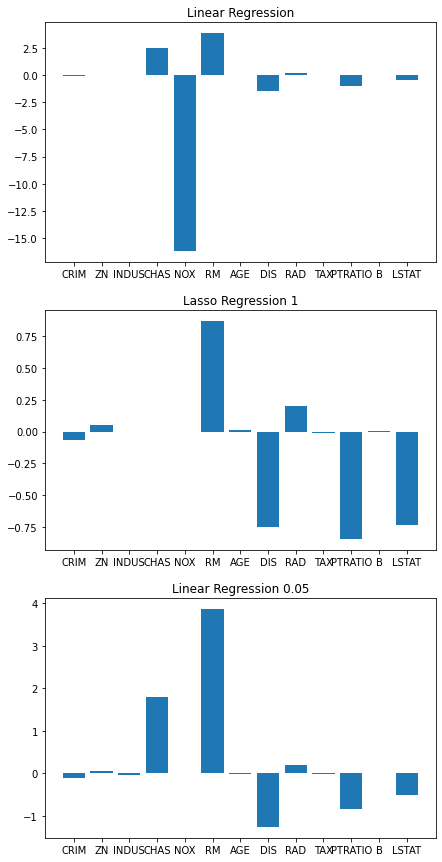

In [26]:
fig = plt.figure(figsize = (7, 15))

# 重回帰分析
ax1 = fig.add_subplot(3, 1, 1)
ax1.bar(x = columns, height = model.coef_)
ax1.set_title('Linear Regression')

# lasso
ax2 = fig.add_subplot(3, 1, 2)
ax2.bar(x = columns, height = lasso.coef_)
ax2.set_title('Lasso Regression 1')

# lasso_005
ax3 = fig.add_subplot(3, 1, 3)
ax3.bar(x = columns, height = lasso_005.coef_)
ax3.set_title('Linear Regression 0.05')